###Instructions
* Each cell must be run sequentially, as the contents of each cell depend on the cells above.  To run a cell, click on it and either hit `shift+enter` on your keyboard or go to `Cell->Run` in the menu above.  
* If things go totally awry, you can close and reload the page, which will reset the code to its initial state.
* Text in the code blocks preceded by `#` are comments to guide you through the excercise and/or explain the code

###Notes:
This exercise is implemented in iPython, a program that wraps up the powerful Python3 programming language in a user-friendly, browser-based way.  


$\langle(x_N)^2\rangle = 4Dt$

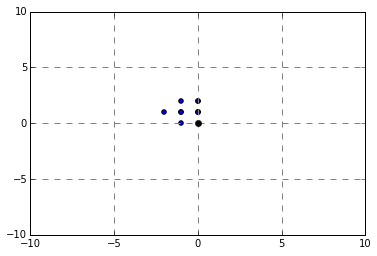

In [1]:
#Import libraries that do things like plot data and handle arrays
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# libraries for making pretty sliders
from IPython.html import widgets
from IPython.html.widgets import interactive
from IPython.display import display

import time

def x(radius,step_size=1):
    """
    """
    
    plt.ylim(-10,10)
    plt.xlim(-10,10)
    for i in range(-10,11,5):
        plt.axhline(i,linestyle="--",color="gray")
        plt.axvline(i,linestyle="--",color="gray")
    
    coordinate = np.array((0,0),dtype=float)
    plt.plot(coordinate[0],coordinate[1],"o",color="black")
    plt.draw()
    
    for i in range(10):
        
        coordinate[0] += np.random.choice([-1,0,1])
        coordinate[1] += np.random.choice([-1,0,1])
        
        plt.scatter(x=coordinate[0],y=coordinate[1])
        plt.pause(0.1)
        plt.draw()



w = widgets.interactive(x,radius=1)
display(w)

1. What happens to the plot when you vary $K_{M}$?
2. What happens to the plot when you vary $k_{cat}$?
3. What happens to the plot when you vary $[E_{tot}]$?


1. What are the blue, red, and black lines on this plot?
2. Why does $k_{cat}\times E_{tot}$ set the "speed limit" on this plot?

(0, 100)

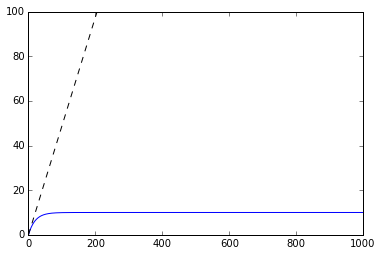

In [2]:

k = 0.05
s0 = 10
def f(t,k=0.005,s0=10):
    return s0*(1 - np.exp(-k*t))

t = np.array(range(1000))
plt.plot(t,f(t,k,s0))
m = (f(1,k,s0) - f(0,k,s0))/(1-0)
b = f(1,k,s0) - m

plt.plot(range(1000),range(1000)*m+b,"--",color="black")
plt.ylim(0,100)


Start with the definition of an acid dissocation constant:

$$\frac{[H^{+}][A]}{[HA]}=K_{acid}$$

Rearrange and take the $log_{10}$ of both sides:

$$[H^{+}]=\frac{K_{acid}[HA]}{[A]}$$

$$log_{10}([H^{+}]) = log_{10}\Big(\frac{K_{acid}[HA]}{[A]}\Big)$$

Recalling that $pX \equiv -log_{10}(X)$ (and factoring out a minus sign) we can write:

$$pH = pK_{a} + log_{10} \Big (\frac{[HA]}{[A]} \Big)$$

$$pH = pK_{a} - log_{10} \Big (\frac{[A]}{[HA]} \Big)$$

This is the Henderson-Hasselbalch equation.  

Now let's think about $\theta$, the fraction of some molecule $A$ that is protonated as a function of $pH$.  This is simply the concentration of protonated molecules ($[HA]$) over all possible molecules:

$$\theta \equiv \frac{[HA]}{[HA] + [A]}$$

We can rearrange Henderson-Hasselbalch to solve for $[A]$:

$$pH - pK_{a} = -log_{10} \Big (\frac{[A]}{[HA]} \Big)$$

$$10^{(pK_{a}-pH)} = \frac{[A]}{[HA]}$$

$$[HA] 10^{(pK_{a}-pH)} = [A]$$

And then substitute into the equation for $\theta$:

$$\theta = \frac{[HA]}{[HA] + [HA] 10^{(pK_{a}-pH)}}$$

$$\theta = \frac{1}{1 + 10^{(pK_{a}-pH)}}$$

We now have an equation that relates the $pK_{a}$ and $pH$ to the saturation of a molecule.  

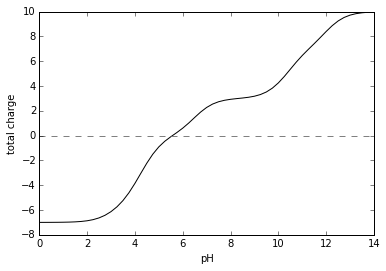

In [3]:

def fractional_charge(pKa,charge,pH):
    
    theta_protonated = 1/(1 + 10**(pKa-pH))
    
    if charge == -1:
        theta_charge = -1*(1-theta_protonated)
    else:
        theta_charge = theta_protonated
        
    return theta_charge


def f(num_asp,num_glu,num_his,num_lys,num_arg):
    
    sequence = num_asp*"D" + num_glu*"E" + num_his*"H" + num_lys*"K" + num_arg*"R"
    
    pKa_dict = {"E":4.5,"D":4.0,"H":6.5,"K":10.5,"R":12.0}
    charge_dict = {"E":-1,"D":-1,"H":1.0,"K":1.0,"R":1.0}
    
    pKas = []
    charges = []
    for s in sequence:
        
        try:
            pKas.append(pKa_dict[s])
            charges.append(charge_dict[s])
        except KeyError:
            pass
        
    # add N-terminus
    pKas.append(10)
    charges.append(1)

    # add C-terminus
    pKas.append(3)
    charges.append(-1)
    
    pH_list = np.arange(0,14,0.25)
    total_charge = np.zeros(len(pH_list))
    for i in range(len(pKas)):
        
        total_charge = total_charge + fractional_charge(pKas[i],charges[i],pH_list)


    
    plt.plot(pH_list,total_charge,color="black")
       
    plt.axhline(y=0,color="gray",linestyle="dashed")    

    # axis labels
    plt.xlabel("pH")
    plt.ylabel("total charge")
    
    


from IPython.html import widgets # Widget definitions
from IPython.display import display # Used to display widgets in the notebook
asp_widget = widgets.IntText(description="num Asp ( 4.0):",value=3)
glu_widget = widgets.IntText(description="num Glu ( 4.5):",value=3)
his_widget = widgets.IntText(description="num His ( 6.5):",value=3)
lys_widget = widgets.IntText(description="num Lys (10.5):",value=3)
arg_widget = widgets.IntText(description="num Arg (12.0):",value=3)

container = widgets.interactive(f,
                                num_asp=asp_widget,
                                num_glu=glu_widget,
                                num_his=his_widget,
                                num_lys=lys_widget,
                                num_arg=arg_widget)

    
display(container)


In [4]:
list(range(0,14))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]